# Exercise H3.2: MLP Regression

## (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
    

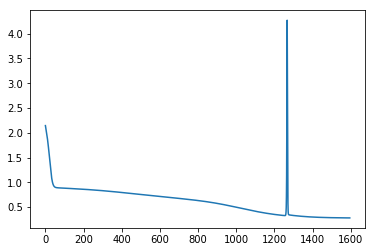

In [2]:
def init_params():
    W1 = np.random.rand(1, 3) - 0.5
    bias1 = np.random.rand(3, 1) - 0.5
    W2 = np.random.rand(3,1) - 0.5
    bias2 = np.random.rand(1) - 0.5
    std_deviation = 0.25
    return W1, bias1, W2, bias2, std_deviation

def forward_propagation(W1, W2, bias1, bias2, X):
    hidden_input = W1.T.dot(X) - bias1
    hidden_output = np.tanh(hidden_input)
    output = W2.T.dot(hidden_output) - bias2
    return hidden_output, output

def output_error(Y_estimate, Y):
    return 0.5*(np.sum((Y_estimate - Y)**2))

data = np.loadtxt('./RegressionData.txt')
N = data.shape[0]
X = data[:, 0].reshape(1, data.shape[0])
Y = data[:, 1].reshape(1, data.shape[0])

def run_bp():
    W1, bias1, W2, bias2, std_deviation = init_params()
    t  = 0
    Errors = []
    Error_tmp = 0
    learning_rate = 0.5
    Y_estimate = 0
    while(t < 3000):
        hidden_output, Y_estimate = forward_propagation(W1, W2, bias1, bias2, X)
        if(len(Errors) == 0):
            Error_tmp = output_error(Y_estimate, Y)
        else:
            tmp_var = output_error(Y_estimate, Y)
            if(abs(Error_tmp - tmp_var) / tmp_var < 10e-5):
                break;
            else:
                Error_tmp = tmp_var           
        Errors.append(Error_tmp)
        hidden_derivatives = - hidden_output**2 + 1
        error_output_layer = Y_estimate - Y
        error_hidden_layer = hidden_derivatives * W2.dot(error_output_layer)
        derivative_input_layer = - X.dot(error_hidden_layer.T) / (N * 1.0)
        derivative_hidden_layer = - hidden_output.dot(error_output_layer.T) / (N * 1.0)
        W1 = W1 + derivative_input_layer * learning_rate
        W2 = W2 + derivative_hidden_layer * learning_rate
        bias1 = bias1 + np.sum(error_hidden_layer, axis=1).reshape(3,1) * learning_rate/(N*1.0)
        bias2 = bias2 + np.sum(error_output_layer)* learning_rate/(N*1.0) 
        t = t + 1
    plt.plot(np.arange(0, len(Errors)), Errors)
    plt.show()
    return W1, bias1, W2, bias2
W1, bias1, W2, bias2 = run_bp()

## (b)

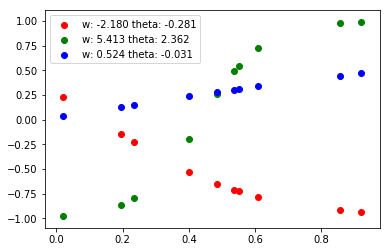

In [3]:
def plot_hidden_output():
    hidden_layer_output, y_pred = forward_propagation(W1, W2, bias1, bias2, X)
#     print output_error(y_pred, Y)
    plt.scatter(X.T, hidden_layer_output[0, :].T, color='r', label="w: " + "%.3f" % W1[:,0] + " theta: " + "%.3f" % bias1[0])
    plt.scatter(X.T, hidden_layer_output[1, :].T, color='g', label="w: " + "%.3f" % W1[:,1] + " theta: " + "%.3f" % bias1[1])
    plt.scatter(X.T, hidden_layer_output[2, :].T, color='b', label="w: " + "%.3f" % W1[:,2] + " theta: " + "%.3f" % bias1[2])
    plt.legend()
    plt.show()
plot_hidden_output()

## (c)

Quadratic Error: 0.2818


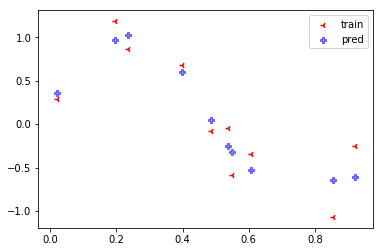

In [4]:
def plot_prediction():
    hidden_layer_output, y_pred = forward_propagation(W1, W2, bias1, bias2, X)
    print "Quadratic Error: %.4f" % output_error(y_pred, Y)
    plt.scatter(X.T, Y.T, color='r', marker="3", label="train")
    plt.scatter(X.T, y_pred.T, color='b', marker="P", alpha= 0.5, label="pred")
    plt.legend()
    plt.show()
plot_prediction()

## (d)

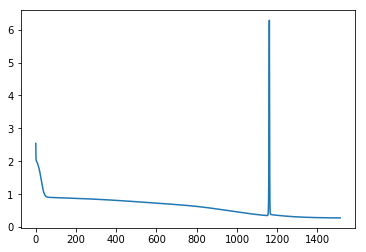

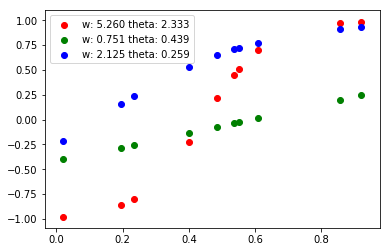

Quadratic Error: 0.2788


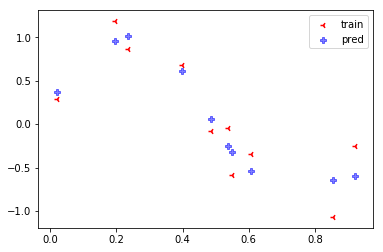

In [5]:
W1, bias1, W2, bias2 = run_bp()
plot_hidden_output()
plot_prediction()

From above, we could see aparent difference between the hidden layer outputs. The reason is the stachastic initilization of paramters. Different initilized values of those parameters means the starting points are different. Then this will lead to the parameters descented to different local optima.

## (e)

Quadratic error is always non-negative. And while the error is closer to zero, the result is better.